In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/attackmodel.csv", mode='a', index=False)

In [3]:
import joblib
import tensorflow as tf
from art.estimators.classification import TensorFlowV2Classifier

model = joblib.load("/home/jovyan/Edge-IIoT/pre_train/SVM.joblib")

# Wrap the model
classifier = TensorFlowV2Classifier(model=model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

2024-04-09 20:29:19.813249: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:29:19.817517: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:29:19.852255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 20:29:20.703694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epsilon = 0.01
FPR: [0.01101377 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97729618 1.        ]
FNR: [0.24561404 0.         0.02270382 0.        ]
TNR: [0.98898623 1.         0.98114901 1.        ]
Accuracy: 0.9793566970715314
Precision(micro,macro,weighted): 0.9793566970715314,0.93099263125209,0.9794683826429379
F1(micro,macro,weighted: 0.9793566970715314,0.9319501806917914,0.9794113779939432
Recall(micro,macro,weighted: 0.9793566970715314,0.932920536635707,0.9793566970715314
FPR: 0.007466188660421577
tpr: 0.932920536635707
fnr: 0.06707946336429309
tnr: 0.9925338113395785


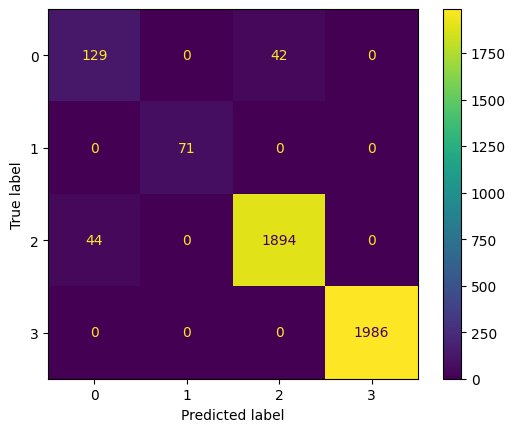

epsilon = 0.1
FPR: [0.01251564 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97420021 1.        ]
FNR: [0.24561404 0.         0.02579979 0.        ]
TNR: [0.98748436 1.         0.98114901 1.        ]
Accuracy: 0.9779164666346616
Precision(micro,macro,weighted): 0.9779164666346616,0.9247271832575911,0.9784110762379404
F1(micro,macro,weighted: 0.9779164666346616,0.9283394888462106,0.9781460127134893
Recall(micro,macro,weighted: 0.9779164666346616,0.9321465428276574,0.9779164666346616
FPR: 0.007841657997092416
tpr: 0.9321465428276574
fnr: 0.06785345717234262
tnr: 0.9921583420029076


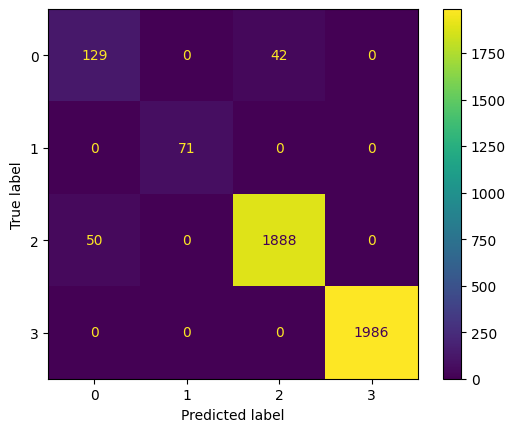

epsilon = 0.2
FPR: [0.01576971 0.         0.02333932 0.        ]
TPR: [0.69590643 1.         0.96749226 1.        ]
FNR: [0.30409357 0.         0.03250774 0.        ]
TNR: [0.98423029 1.         0.97666068 1.        ]
Accuracy: 0.972395583293327
Precision(micro,macro,weighted): 0.972395583293327,0.9067153007863957,0.9732383240158391
F1(micro,macro,weighted: 0.972395583293327,0.9111166896935892,0.9727863986025823
Recall(micro,macro,weighted: 0.972395583293327,0.9158496732026143,0.972395583293327
FPR: 0.009777257478490842
tpr: 0.9158496732026143
fnr: 0.08415032679738561
tnr: 0.9902227425215091


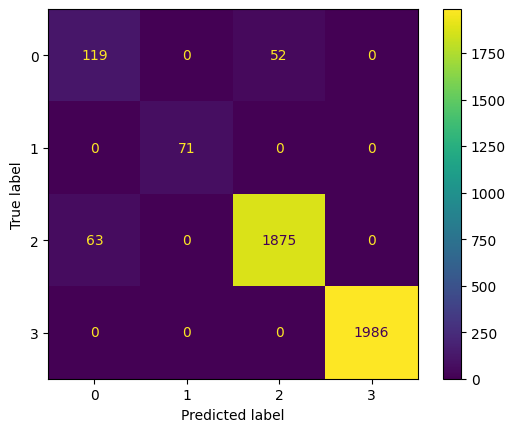

epsilon = 0.3
FPR: [0.01702128 0.         0.02199282 0.        ]
TPR: [0.71345029 1.         0.96491228 1.        ]
FNR: [0.28654971 0.         0.03508772 0.        ]
TNR: [0.98297872 1.         0.97800718 1.        ]
Accuracy: 0.971915506481037
Precision(micro,macro,weighted): 0.971915506481037,0.9041427826993226,0.9734313133665743
F1(micro,macro,weighted: 0.971915506481037,0.911391455044144,0.9725853984706
Recall(micro,macro,weighted: 0.971915506481037,0.9195906432748537,0.971915506481037
FPR: 0.009753523816799725
tpr: 0.9195906432748537
fnr: 0.0804093567251462
tnr: 0.9902464761832003


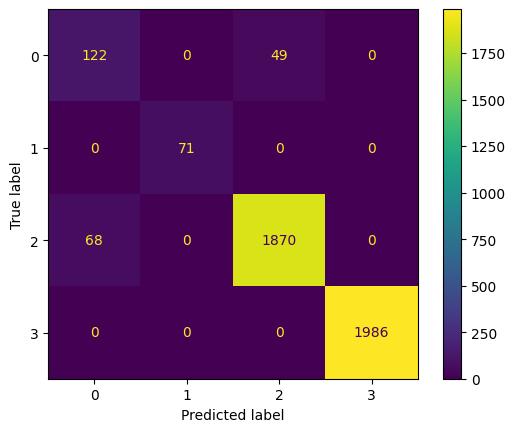

In [4]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon = 0.01
FPR: [0.01076345 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97781218 1.        ]
FNR: [0.24561404 0.         0.02218782 0.        ]
TNR: [0.98923655 1.         0.98114901 1.        ]
Accuracy: 0.9795967354776765
Precision(micro,macro,weighted): 0.9795967354776765,0.9320792462570986,0.9796515403228584
F1(micro,macro,weighted: 0.9795967354776765,0.9325627762625788,0.9796238451664916
Recall(micro,macro,weighted: 0.9795967354776765,0.9330495356037152,0.9795967354776765
FPR: 0.007403610437643104
tpr: 0.9330495356037152
fnr: 0.06695046439628483
tnr: 0.9925963895623569


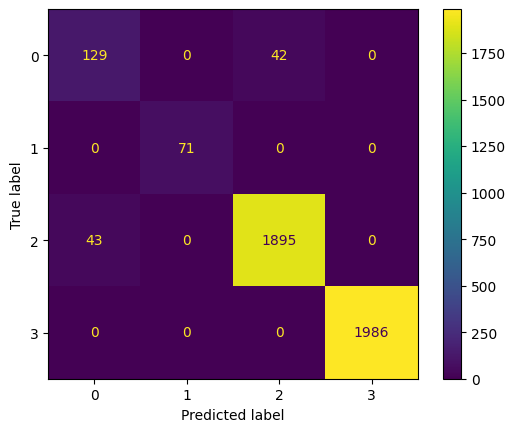

epsilon = 0.1
FPR: [0.01326658 0.         0.01840215 0.        ]
TPR: [0.76023392 1.         0.97265222 1.        ]
FNR: [0.23976608 0.         0.02734778 0.        ]
TNR: [0.98673342 1.         0.98159785 1.        ]
Accuracy: 0.9774363898223716
Precision(micro,macro,weighted): 0.9774363898223716,0.922273717719558,0.9782093034379908
F1(micro,macro,weighted: 0.9774363898223716,0.9275340386707374,0.9777837872314123
Recall(micro,macro,weighted: 0.9774363898223716,0.9332215342277261,0.9774363898223716
FPR: 0.007917184406900007
tpr: 0.9332215342277261
fnr: 0.06677846577227382
tnr: 0.9920828155931


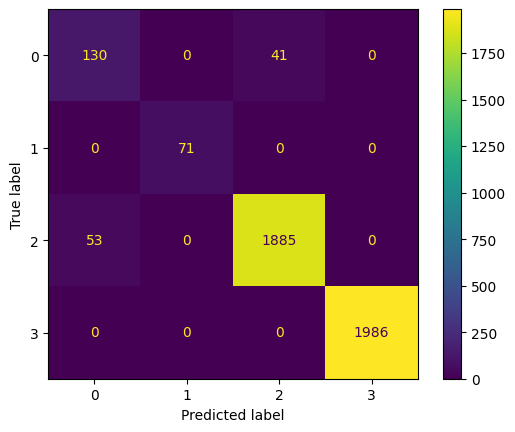

epsilon = 0.2
FPR: [0.02152691 0.         0.03545781 0.        ]
TPR: [0.56140351 0.94366197 0.95562436 1.        ]
FNR: [0.43859649 0.05633803 0.04437564 0.        ]
TNR: [0.97847309 1.         0.96454219 1.        ]
Accuracy: 0.9603936629860778
Precision(micro,macro,weighted): 0.9603936629860778,0.8716402706563244,0.9615725929149956
F1(micro,macro,weighted: 0.9603936629860778,0.8680692906167989,0.9609460547752107
Recall(micro,macro,weighted: 0.9603936629860778,0.8651724589020189,0.9603936629860778
FPR: 0.01424617958264707
tpr: 0.8651724589020189
fnr: 0.13482754109798106
tnr: 0.9857538204173529


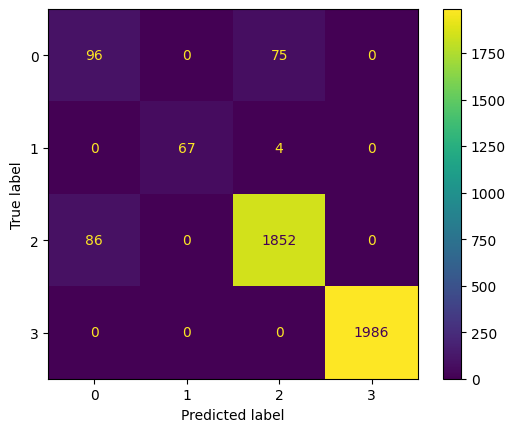

epsilon = 0.3
FPR: [0.02628285 0.         0.03680431 0.        ]
TPR: [0.54385965 0.94366197 0.94582043 1.        ]
FNR: [0.45614035 0.05633803 0.05417957 0.        ]
TNR: [0.97371715 1.         0.96319569 1.        ]
Accuracy: 0.9551128180508881
Precision(micro,macro,weighted): 0.9551128180508881,0.8567192815887332,0.9583133282336329
F1(micro,macro,weighted: 0.9551128180508881,0.8566364808075349,0.9565720149831318
Recall(micro,macro,weighted: 0.9551128180508881,0.8583355135975814,0.9551128180508881
FPR: 0.01577179059102154
tpr: 0.8583355135975814
fnr: 0.14166448640241863
tnr: 0.9842282094089785


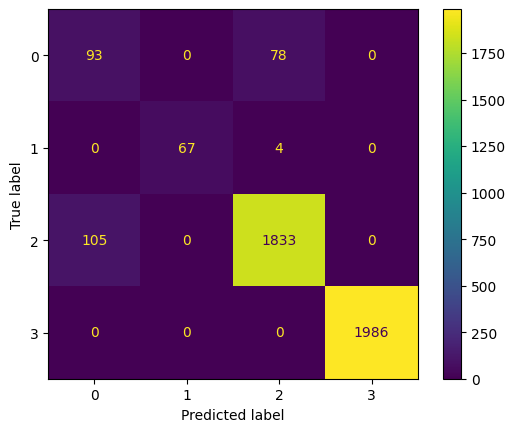

In [5]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon = 0.01
FPR: [0.02202753 0.         0.93087971 0.84724771]
TPR: [0.0994152  0.         0.07223942 0.        ]
FNR: [0.9005848  1.         0.92776058 1.        ]
TNR: [0.97797247 1.         0.06912029 0.15275229]
Accuracy: 0.03768602976476236
Precision(micro,macro,weighted): 0.03768602976476236,0.056284681894438,0.03606172341813947
F1(micro,macro,weighted: 0.03768602976476236,0.047656446343302336,0.03642795463509396
Recall(micro,macro,weighted: 0.03768602976476236,0.04291365669074647,0.03768602976476236
FPR: 0.45003873839672476
tpr: 0.04291365669074647
fnr: 0.9570863433092535
tnr: 0.5499612616032752


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


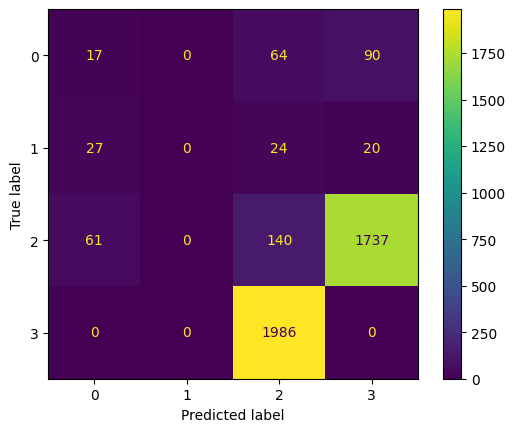

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.1
FPR: [0.02177722 0.         0.93087971 0.84770642]
TPR: [0.0994152  0.         0.07223942 0.        ]
FNR: [0.9005848  1.         0.92776058 1.        ]
TNR: [0.97822278 1.         0.06912029 0.15229358]
Accuracy: 0.03768602976476236
Precision(micro,macro,weighted): 0.03768602976476236,0.05667387603363214,0.03612562375208301
F1(micro,macro,weighted: 0.03768602976476236,0.04776843580311788,0.036446341766758344
Recall(micro,macro,weighted: 0.03768602976476236,0.04291365669074647,0.03768602976476236
FPR: 0.4500908390730289
tpr: 0.04291365669074647
fnr: 0.9570863433092535
tnr: 0.5499091609269712


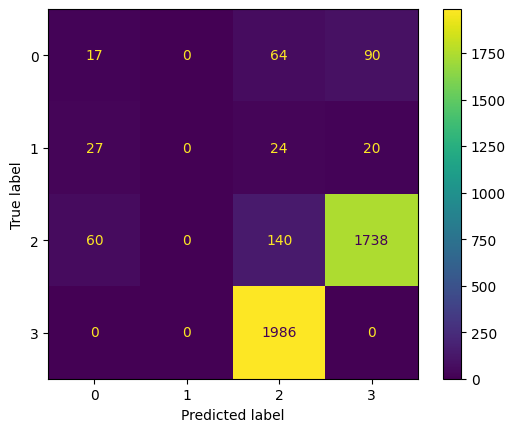

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.2
FPR: [0.02177722 0.         0.93177738 0.84724771]
TPR: [0.0994152  0.         0.07172343 0.        ]
FNR: [0.9005848  1.         0.92827657 1.        ]
TNR: [0.97822278 1.         0.06822262 0.15275229]
Accuracy: 0.03744599135861738
Precision(micro,macro,weighted): 0.03744599135861738,0.05655387220003473,0.03590232329167805
F1(micro,macro,weighted: 0.03744599135861738,0.04764398134973623,0.03621475969219893
Recall(micro,macro,weighted: 0.03744599135861738,0.04278465772273822,0.03744599135861738
FPR: 0.45020057669100194
tpr: 0.04278465772273822
fnr: 0.9572153422772618
tnr: 0.549799423308998


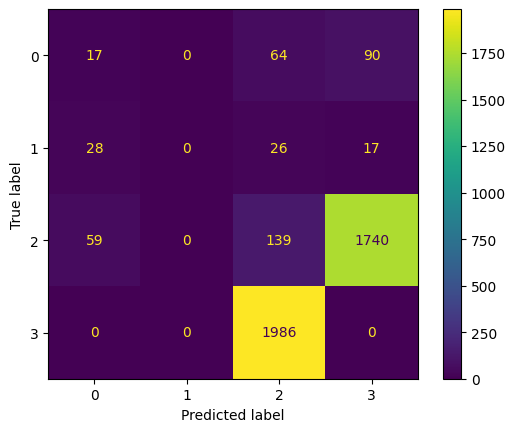

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epsilon = 0.3
FPR: [0.02302879 0.         0.93177738 0.84633028]
TPR: [0.0994152  0.         0.07017544 0.        ]
FNR: [0.9005848  1.         0.92982456 1.        ]
TNR: [0.97697121 1.         0.06822262 0.15366972]
Accuracy: 0.036725876140182426
Precision(micro,macro,weighted): 0.036725876140182426,0.05436153093219636,0.035003224153404566
F1(micro,macro,weighted: 0.036725876140182426,0.046742685025817556,0.035474077917871334
Recall(micro,macro,weighted: 0.036725876140182426,0.04239766081871345,0.036725876140182426
FPR: 0.4502841100067292
tpr: 0.04239766081871345
fnr: 0.9576023391812865
tnr: 0.5497158899932707


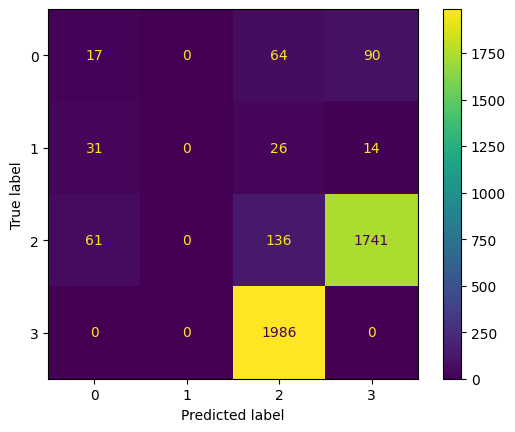

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)

epsilon = 0.01
FPR: [0.01076345 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97781218 1.        ]
FNR: [0.24561404 0.         0.02218782 0.        ]
TNR: [0.98923655 1.         0.98114901 1.        ]
Accuracy: 0.9795967354776765
Precision(micro,macro,weighted): 0.9795967354776765,0.9320792462570986,0.9796515403228584
F1(micro,macro,weighted: 0.9795967354776765,0.9325627762625788,0.9796238451664916
Recall(micro,macro,weighted: 0.9795967354776765,0.9330495356037152,0.9795967354776765
FPR: 0.007403610437643104
tpr: 0.9330495356037152
fnr: 0.06695046439628483
tnr: 0.9925963895623569


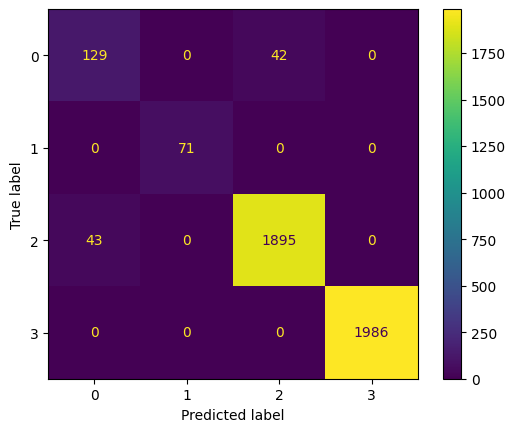

epsilon = 0.1
FPR: [0.01401752 0.         0.01885099 0.        ]
TPR: [0.75438596 1.         0.97110423 1.        ]
FNR: [0.24561404 0.         0.02889577 0.        ]
TNR: [0.98598248 1.         0.98114901 1.        ]
Accuracy: 0.9764762361977917
Precision(micro,macro,weighted): 0.9764762361977917,0.9188669438669439,0.9774201211071111
F1(micro,macro,weighted: 0.9764762361977917,0.9248359119976259,0.9768961445319738
Recall(micro,macro,weighted: 0.9764762361977917,0.9313725490196079,0.9764762361977917
FPR: 0.008217127333763254
tpr: 0.9313725490196079
fnr: 0.06862745098039215
tnr: 0.9917828726662368


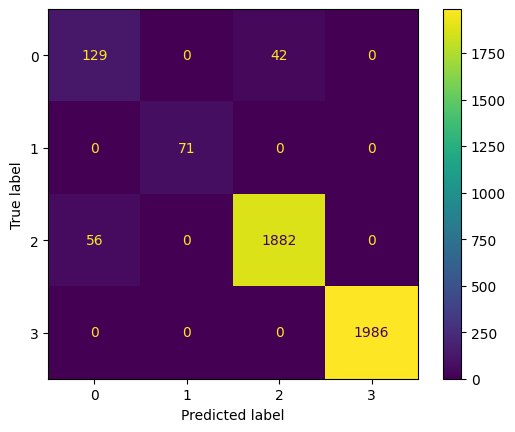

epsilon = 0.2
FPR: [0.02002503 0.         0.03366248 0.        ]
TPR: [0.56140351 1.         0.95872033 1.        ]
FNR: [0.43859649 0.         0.04127967 0.        ]
TNR: [0.97997497 1.         0.96633752 1.        ]
Accuracy: 0.9627940470475276
Precision(micro,macro,weighted): 0.9627940470475276,0.8766636880966938,0.9632930216772416
F1(micro,macro,weighted: 0.9627940470475276,0.8783181970121431,0.9630380728192353
Recall(micro,macro,weighted: 0.9627940470475276,0.8800309597523219,0.9627940470475276
FPR: 0.01342187721186492
tpr: 0.8800309597523219
fnr: 0.11996904024767802
tnr: 0.9865781227881352


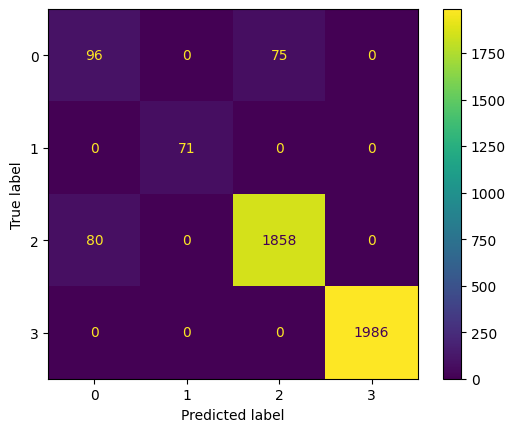

epsilon = 0.3
FPR: [0.02352941 0.         0.04533214 0.        ]
TPR: [0.40935673 1.         0.95149639 1.        ]
FNR: [0.59064327 0.         0.04850361 0.        ]
TNR: [0.97647059 1.         0.95466786 1.        ]
Accuracy: 0.9531925108017283
Precision(micro,macro,weighted): 0.9531925108017283,0.8437253119317826,0.9523166829145482
F1(micro,macro,weighted: 0.9531925108017283,0.8419228862127682,0.9527456679614377
Recall(micro,macro,weighted: 0.9531925108017283,0.8402132782937737,0.9531925108017283
FPR: 0.017215387052487062
tpr: 0.8402132782937737
fnr: 0.15978672170622635
tnr: 0.982784612947513


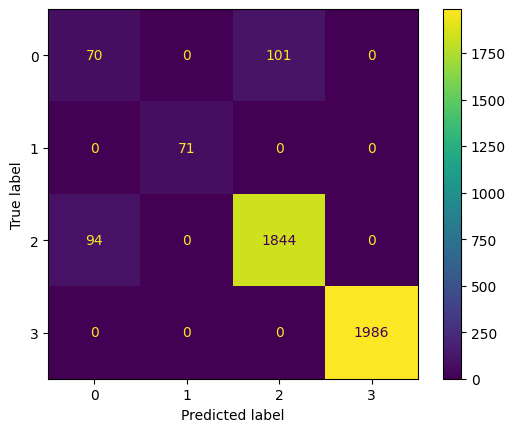

In [7]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PDG", epsilon)